**DNA SEQUENCINIG WITH MACHILE LEARNING**

Applying classification model that can predict agene's function based on the DNA SEQUENCE of the coding sequence


Importing liberary

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# READ the data
human_data = pd.read_table("/content/sample_data/human_data.txt")
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


## FEATURE EXTRACTION


In [30]:
# function to convert sequence string into k-mer words,default size =6(hexamer words)
def getkmers(sequence,size =6):
  return [sequence[x : x+size].lower() for x in range (len(sequence)-size +1)]

**Convert trining data sequences into short overlapping k-mers of length =6**

In [31]:
human_data['words'] = human_data.apply(lambda x:getkmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence',axis =1)

**Main datasequence is changed**

In [32]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [33]:
human_texts = list(human_data['words'])  # converting into list
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])  # joinind all datasequence with a blank space
y_data = human_data.iloc[:, 0].values    # y_dat is the output data

In [34]:
print(human_texts[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [35]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

INDEPENDENT FREATURE NAD DEPENDENT FEATURE 

IN NLP MODEL CANNOT BUILT ON STRING DATA

# CONVERTING THE STIRNG INTO BAG OF WORDS USING **COUNTVECTORIZER**

HAVE TO LEARN WHAT IS BAG OF WORDS AND COUNTVECTORIZER

In [36]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
# TESTING DIFFERENT RANGES
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)

In [37]:
print(X.shape)

(4380, 232414)


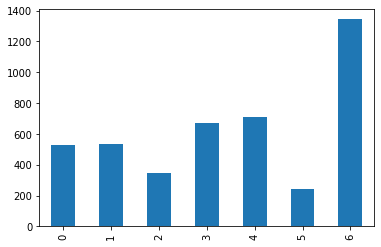

In [38]:
# chechin fro balance data sequence
human_data['class'].value_counts().sort_index().plot.bar()

In [39]:
#splitting the human_dataset for training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_data,test_size = 0.20, random_state =42)

In [40]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


A multinomial naive Bayes classifier will be created. I previously did some parameter tuning and found the ngram size of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best.

In [41]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))


def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
